# Description
Author: HE KAI LIM
Course: MAE 263F (Flexible Structures and Soft Robots), UCLA Fall 2024

This ipynb notebook is my submission for homework 2.

The script is run from the local virtual environment.

## Notes
Use python black linter and formatter (https://code.visualstudio.com/docs/python/formatting)


# Imports

In [1]:
# imports for python things
import os

# imports for numpy OR cupy
cupy_active = False  # my environment is not (yet) properly configured for cupy
if not cupy_active:
    import numpy as np
else:
    import cupy as np  # this is a drop-in replacement for numpy, that uses the GPU instead of CPU for speed. Go NVDIA Cude Cores!

# Imports for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output  # Only for iPython

######## Helper Functions from Class
# import helper_functions.helper_imports as helper
import helper_functions as helper

# import helper_functions.computekappa

# import helper_functions.computeTangent as computeTangent
# import helper_functions.computeSpaceParallel as computeSpaceParallel
# import helper_functions.computeMaterialFrame as computeMaterialFrame

# If we want to run this script quietly without so many outputs, set to True.
quiet_Run = True

In [2]:
result = helper.crossMat([1, 2, 3])
print(result)

[[ 0 -3  2]
 [ 3  0 -1]
 [-2  1  0]]


# Local Helper - Plot the Rod

In [3]:
# Function to set equal aspect ratio for 3D plots
def set_axes_equal(ax):
    """
    Set equal aspect ratio for a 3D plot in Matplotlib.
    This function adjusts the limits of the plot to make sure
    that the scale is equal along all three axes.
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])

    max_range = max(x_range, y_range, z_range)

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim3d([x_middle - max_range / 2, x_middle + max_range / 2])
    ax.set_ylim3d([y_middle - max_range / 2, y_middle + max_range / 2])
    ax.set_zlim3d([z_middle - max_range / 2, z_middle + max_range / 2])

In [4]:
def plotrod(q, a1, a2, m1, m2, ctime):
    """
    Function to plot the rod with the position and directors.

    Parameters:
    - q: Position vector (DOF vector).
    - a1, a2: Reference frames (director vectors).
    - m1, m2: Material directors.
    - ctime: Current time for title.
    """

    nv = (len(q) + 1) // 4
    x1 = q[0::4]
    x2 = q[1::4]
    x3 = q[2::4]

    # Compute the length of the rod
    L = np.sum(np.sqrt((x1[1:] - x1[:-1])**2 +
                       (x2[1:] - x2[:-1])**2 +
                       (x3[1:] - x3[:-1])**2))

    # Scale the director vectors by 0.1 * L
    a1 *= 0.1 * L
    a2 *= 0.1 * L
    m1 *= 0.1 * L
    m2 *= 0.1 * L

    # Create figure and set up 3D plotting
    fig = plt.figure(1)
    clear_output()
    plt.clf()  # Clear the figure
    ax = fig.add_subplot(111, projection='3d')

    # Plot the rod as black circles connected by lines
    ax.plot3D(x1, x2, x3, 'ko-')

    # Plot the first node with a red triangle
    ax.plot3D([x1[0]], [x2[0]], [x3[0]], 'r^')

    # Plot the directors along the rod
    for c in range(nv - 1):
        xa = q[4 * c : 4 * c + 3]
        xb = q[4 * c + 4 : 4 * c + 7]
        xp = (xa + xb) / 2  # Midpoint between xa and xb

        # Plot the a1, a2, m1, m2 vectors at the midpoint
        ax.plot3D([xp[0], xp[0] + a1[c, 0]], [xp[1], xp[1] + a1[c, 1]],
                  [xp[2], xp[2] + a1[c, 2]], 'b--', linewidth=2)
        ax.plot3D([xp[0], xp[0] + a2[c, 0]], [xp[1], xp[1] + a2[c, 1]],
                  [xp[2], xp[2] + a2[c, 2]], 'c--', linewidth=2)
        ax.plot3D([xp[0], xp[0] + m1[c, 0]], [xp[1], xp[1] + m1[c, 1]],
                  [xp[2], xp[2] + m1[c, 2]], 'r-', linewidth=2)
        ax.plot3D([xp[0], xp[0] + m2[c, 0]], [xp[1], xp[1] + m2[c, 1]],
                  [xp[2], xp[2] + m2[c, 2]], 'g-', linewidth=2)

    # Add legend
    ax.legend(['a1', 'a2', 'm1', 'm2'])

    # Set the title with current time
    ax.set_title(f't={ctime:.2f}')

    # Set axes labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Set equal scaling using the custom function
    set_axes_equal(ax)

    # return fig

    plt.draw()  # Force a redraw of the figure
    plt.show()

In [5]:
def plotrod_simple(q, ctime):
    """
    Function to plot the rod with the position and directors.

    Parameters:
    - q: Position vector (DOF vector).
    - ctime: Current time for title.
    """

    x1 = q[0::4]
    x2 = q[1::4]
    x3 = q[2::4]

    fig = plt.figure(1)
    clear_output()
    plt.clf()  # Clear the figure
    ax = fig.add_subplot(111, projection='3d')

    # Plot the rod as black circles connected by lines
    ax.plot3D(x1, x2, x3, 'ko-')

    # Plot the first node with a red triangle
    ax.plot3D([x1[0]], [x2[0]], [x3[0]], 'r^')

    # Set the title with current time
    ax.set_title(f't={ctime:.2f}')

    # Set axes labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Set equal scaling and a 3D view
    set_axes_equal(ax)

    return fig
    plt.draw()  # Force a redraw of the figure


    plt.show()

# Local Helper - Objective Function

In [6]:
def objfun(qGuess, q0, u, a1, a2,
           freeIndex, # Boundary conditions
           dt, tol, # time stepping parameters
           refTwist, # We need a guess refTwist to compute the new refTwist
           massVector, mMat, # Mass vector and mass matrix
           EA, refLen, # Stretching stiffness and reference length\
           EI, GJ, voronoiRefLen, kappaBar, twistBar, # bending and twisting
           Fg):

  q = qGuess # Guess
  iter = 0
  error = 10 * tol

  while error > tol:
    a1Iterate, a2Iterate = helper.computeTimeParallel(a1, q0, q) # Reference frame
    tangent = helper.computeTangent(q)
    refTwist_iterate = helper.getRefTwist(a1Iterate, tangent, refTwist) # Reference twist

    # Material frame
    theta = q[3::4] # twist angles
    m1Iterate, m2Iterate = helper.computeMaterialFrame(a1Iterate, a2Iterate, theta)

    # Compute my elastic forces
    # Bending
    Fb, Jb = helper.getFb(q, m1Iterate, m2Iterate, kappaBar, EI, voronoiRefLen) # Need to write this
    # Twisting
    Ft, Jt = helper.getFt(q, refTwist_iterate, twistBar, GJ, voronoiRefLen) # Need to write this
    # Stretching
    Fs, Js = helper.getFs(q, EA, refLen)

    # Set up EOMs
    Forces = Fb + Ft + Fs + Fg
    Jforces = Jb + Jt + Js
    f = massVector/dt * ( (q-q0)/dt - u ) - Forces
    J = mMat / dt**2 - Jforces
    # Free components of f and J to impose BCs
    f_free = f[freeIndex]
    J_free = J[np.ix_(freeIndex, freeIndex)]

    # Update
    dq_free = np.linalg.solve(J_free, f_free)

    q[freeIndex] = q[freeIndex] - dq_free # Update free DOFs
    error = np.sum(np.abs(f_free))

    if not quiet_Run:
      print('Iter = %d' % iter)
      print('Error = %f' % error)

    iter += 1

  u = (q - q0) / dt # velocity vector

  return q, u, a1Iterate, a2Iterate

# Main DER

## DOFs and Nodes

In [7]:
nv = 100 # nodes
# nv = 20 # nodes
ne = nv - 1 # edges
ndof = 4 * nv - 1 # degrees of freedom: 3*nv + ne

RodLength = 0.2 # [m] 0.2m = 20cm
natR = 0.02 # natural radius  0.02m = 2cm
r0 = 0.001 # cross-sectional radius  0.001m = 0.1cm = 1mm

# Matrix (numpy ndarray) for the nodes at t=0
nodes = np.zeros((nv, 3))
if natR == 0: # straight rod
  for c in range(nv):
    nodes[c, 0] = c * RodLength / (nv - 1) # x coordinate of c-th node
    nodes[c, 1] = 0
    nodes[c, 2] = 0
else: # rod with circular shape (ring)
  dTheta = (RodLength / natR) * (1.0 / ne)
  for c in range(nv):
    nodes[c, 0] = natR * np.cos(c * dTheta)
    nodes[c, 1] = natR * np.sin(c * dTheta)
    nodes[c, 2] = 0.0

## Elastic Stiffnesses and Parameters

In [8]:
# Material parameters
Y = 10e6 # Pascals  10 MPa
nu = 0.5 # Poisson's raio
# G = Y / (2.0 * (1.0 + nu)) # shear modulus
G = Y / 3  # HW2 - corresponding to incompressible material

# Stiffness parameters
EI = Y * np.pi * r0**4 / 4 # Bending stiffness
GJ = G * np.pi * r0**4 / 2 # Twisting stiffness
EA = Y * np.pi * r0**2 # Stretching stiffness

## Time stepping parameters

In [9]:
totalTime = 5 # second
# dt = 0.01 # second (may need sensitivity analysis)
dt = 0.005

# Tolerance
tol = EI / RodLength**2 * 1e-3

## Mass vector and matrix

In [10]:
rho = 1000 # Density (kg/m^3)
totalM = (np.pi * r0**2 * RodLength) * rho # total mass in kg
dm = totalM / ne # mass per edge

massVector = np.zeros(ndof)
for c in range(nv): # 0, 1, 2, ..., nv-1 MATLAB: for c=1:nv
  ind = [4*c, 4*c+1, 4*c+2]
  if c == 0: # first node
    massVector[ind] = dm/2
  elif c == nv-1: # last node
    massVector[ind] = dm/2
  else: # internal nodes
    massVector[ind] = dm

for c in range(ne):
  massVector[4*c + 3] = 1/2 * dm * r0**2

# Diagonal matrix rerpesentation of mass vector
mMat = np.diag(massVector)

## External Forces

In [11]:
# Gravity
g = np.array([0, 0, -9.81])
Fg = np.zeros(ndof) # External force vector for gravity
for c in range(nv):
  ind = [4*c, 4*c+1, 4*c+2]
  Fg[ind] = massVector[ind] * g

## Initial DOF vector

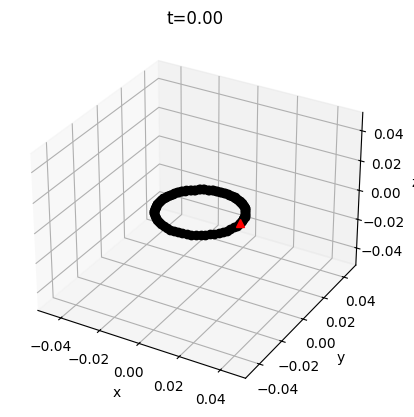

In [12]:
# DOF vector at t = 0
q0 = np.zeros(ndof)
for c in range(nv):
  ind = [4*c, 4*c+1, 4*c+2]
  q0[ind] = nodes[c, :]

u = np.zeros_like(q0) # velocity vector

fig = plotrod_simple(q0, 0)
plt.draw()  # Force a redraw of the figure

save_filename = r'figures\t=0s.png'
plt.savefig(save_filename, 
              # transparent=True, 
              dpi=300,
              )

plt.show()

## Compute reference (undeformed) length of each edge and the Voroni length

In [13]:
# Reference (undeformed) length of each edge
refLen = np.zeros(ne)
for c in range(ne): # loop over each edge
  dx = nodes[c+1, :] - nodes[c, :] # edge vector from one node to the next
  refLen[c] = np.linalg.norm(dx)

# Voronoi length of each node
voronoiRefLen = np.zeros(nv)
for c in range(nv): # loop over each node
  if c==0:
    voronoiRefLen[c] = 0.5 * refLen[c]
  elif c==nv-1:
    voronoiRefLen[c] = 0.5 * refLen[c-1]
  else:
    voronoiRefLen[c] = 0.5 * (refLen[c-1] + refLen[c])

## Set up referemce frame (a1, a2) and material frame (m1, m2)

In [14]:
# Reference frame (Space parallel transport at t=0)
a1 = np.zeros((ne,3)) # First reference director
a2 = np.zeros((ne,3)) # Second reference director
tangent = helper.computeTangent(q0) # We need to create this function

t0 = tangent[0,:] # tangent on the first edge
t1 = np.array([0, 0, -1]) # "arbitrary" vector
a1_first = np.cross(t0, t1) # This is perpendicular to tangent t0
# Check for null vector
if np.linalg.norm(a1_first) < 1e-6:
  t1 = np.array([0, 1, 0]) # new arbitrary vector
  a1_first = np.cross(t0, t1)
a1_first = a1_first / np.linalg.norm(a1_first) # Normalize
a1, a2 = helper.computeSpaceParallel(a1_first, q0) # We need to create this function
# a1, a2, tangent all have size (ne,3)

# Material frame
theta = q0[3::4] # twist angles
m1, m2 = helper.computeMaterialFrame(a1, a2, theta) # Compute material frame

## Compute natural curvature, natural twist, and reference twist

In [15]:
# Reference twist
refTwist = np.zeros(nv)
refTwist = helper.getRefTwist(a1, tangent, refTwist) # We need to write this function

# Natural curvature
kappaBar = helper.getKappa(q0, m1, m2) # We need to write this function

# Natural twist
twistBar = np.zeros(nv)

## Set up boundary conditions

In [16]:
# Fixed and Free DOFs
fixedIndex = np.arange(0,7) # First seven (2 nodes and one edge) are fixed: clamped
freeIndex = np.arange(7,ndof)

## Time stepping loop

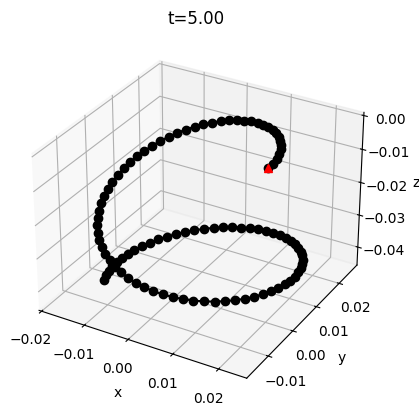

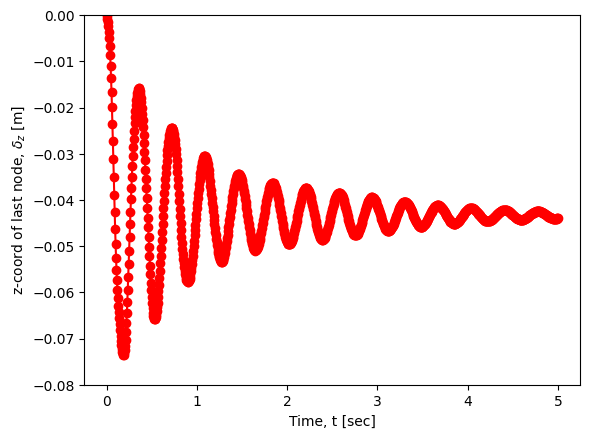

In [17]:
Nsteps = round(totalTime / dt ) # Total number of steps
ctime = 0 # current time
endZ = np.zeros(Nsteps) # Store z-coordinate of the last node with time

for timeStep in range(Nsteps):  # + 1 to get the last snapshot of time at t = 5.00s
  print('Current time = %f' % ctime)

  qGuess = q0.copy() # This should be fixed - I did not include this line in class
  q, u, a1, a2 = objfun( qGuess, # Guess solution
                        q0, u, a1, a2,
                         freeIndex, # Boundary conditions
                         dt, tol, # time stepping parameters
                         refTwist, # We need a guess refTwist to compute the new refTwist
                         massVector, mMat, # Mass vector and mass matrix
                         EA, refLen, # Stretching stiffness and reference length
                         EI, GJ, voronoiRefLen, kappaBar, twistBar, # bending and twisting
                         Fg
                        )

  ctime += dt # Update current time

  # Update q0 with the new q
  q0 = q.copy()

  # Store the z-coordinate of the last node
  endZ[timeStep] = q[-1]

  # Every 10 time steps, update material directors and plot the rod
  if timeStep % 50 == 0:
    fig = plotrod_simple(q, ctime-dt)
    if timeStep != Nsteps-1:
      # To save figure, we must first save before drawing and showing.
      plt.draw()  # Force a redraw of the figure
      plt.show()
    
  
  #########################

  # Save the screenshots of each timestamp: 0 and 50
  if timeStep == Nsteps-1:
    fig = plotrod_simple(q, ctime)
    save_filename = r'figures\t=5s.png'  # Replace with your desired filename
    plt.savefig(save_filename, 
                # transparent=True, 
                dpi=300,
                )
    plt.draw()  # Force a redraw of the figure
    plt.show()
  
  

# Visualization after the loop
plt.figure(2)
time_array = np.arange(1, Nsteps + 1) * dt
plt.plot(time_array, endZ, 'ro-')
plt.box(True)
plt.xlabel('Time, t [sec]')
plt.ylabel('z-coord of last node, $\\delta_z$ [m]')

plt.ylim([-0.08, 0])

plt.draw()  # Force a redraw of the figure


save_filename = r'figures\z_plot.png'
# save_path = os.path.join(figures_dir, save_filename)
plt.savefig(save_filename, 
            transparent=True, 
            dpi=300,
            )

plt.show()


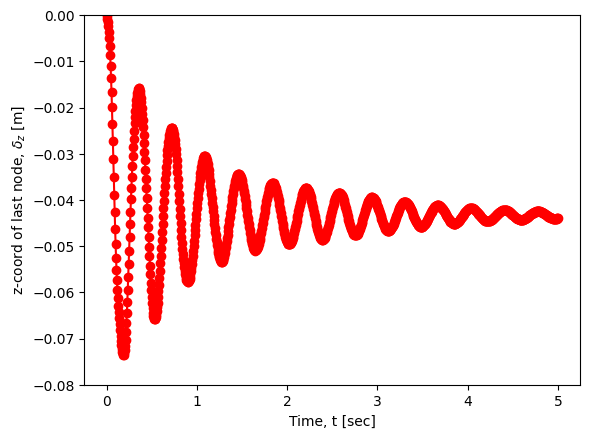

In [18]:
# Visualization after the loop
plt.figure(2)
time_array = np.arange(1, Nsteps + 1) * dt
plt.plot(time_array, endZ, 'ro-')
plt.box(True)
plt.xlabel('Time, t [sec]')
plt.ylabel('z-coord of last node, $\\delta_z$ [m]')

plt.ylim([-0.08, 0])

save_filename = r'figures\z_plot.png'
# save_path = os.path.join(figures_dir, save_filename)
# plt.savefig(save_filename, 
#             transparent=True, 
#             dpi=300,
#             )

plt.show()
